In [15]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

template_dir_results = "/afs/ihep.ac.cn/users/l/luoxj/sk_psd/model_maxtime_{}_jobs_DSNB_sk_data_data_dE_dx_dependent/{}"
# template_dir_results = "/afs/ihep.ac.cn/users/l/luoxj/sk_psd/model_maxtime_{}_jobs_DSNB_sk_data_data_three_components/{}"
v_option_training = ["time", "WeightEtime", "combine"]
v_option_print = ["w/o charge", "w/ charge", "combine"]
v_name_files = ["eff_timeNoWeightE_input.npz","eff_timeWeightE_input.npz","eff_timeCombine_input.npz"]

from copy import copy
dir_eff_sig_diff_options ={}
v_files_list = []
for i in range(len(v_option_training)):
# for i in [0]:
    name_file = template_dir_results.format(v_option_training[i],
                    v_name_files[i])
    v_files_list.append(name_file)
    with np.load(name_file, allow_pickle=True) as f:
        # dir_bkg_eff = f["eff_bkg"].item()
        # dir_sig_eff = f["eff_sig"].item()
        dir_eff_sig = f['dir_eff_sig_1_percent_bkg'].item()
        dir_eff_sig_diff_options[v_option_print[i]] = copy(dir_eff_sig)

<Figure size 576x432 with 0 Axes>

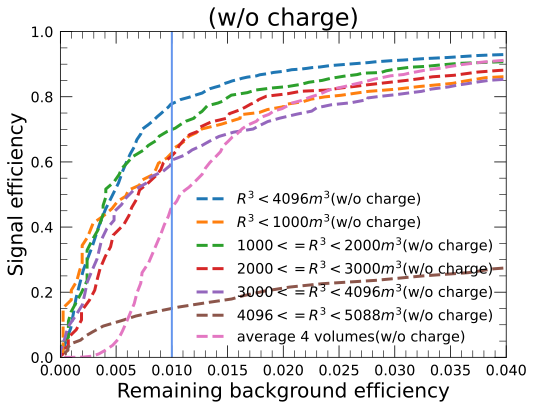

<Figure size 576x432 with 0 Axes>

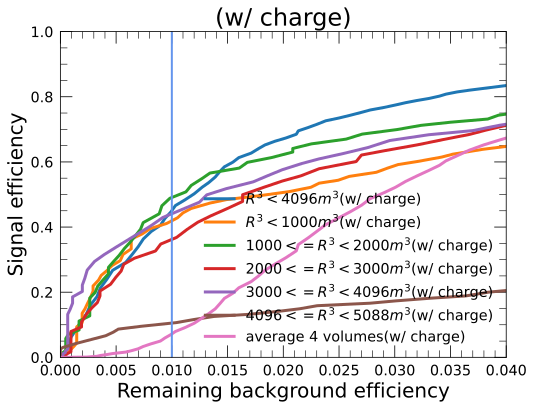

<Figure size 576x432 with 0 Axes>

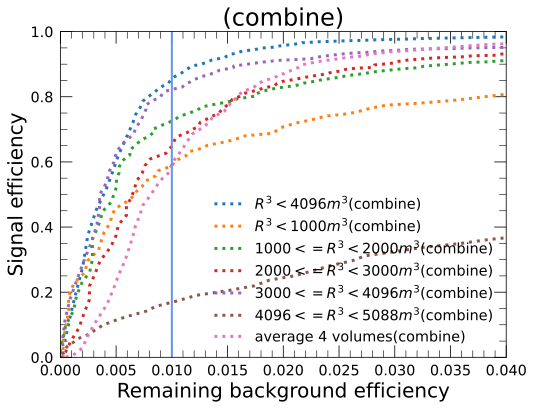

In [16]:
def LoadnpzDict(name_file:str):
    dataset = np.load(name_file, allow_pickle=True)
    eff_sig_dir = dataset["eff_sig"].item()
    eff_bkg_dir = dataset["eff_bkg"].item()
    return (eff_sig_dir, eff_bkg_dir)
def PlotResult(input_filelist:list):
    # fig, ax = plt.subplots()
    for file in input_filelist:
        plt.figure()
        fig, ax = plt.subplots()
        if "No" in file:
            type_line:str = "--"
            label_file = "(w/o charge)"
        elif "Combine" in file:
            type_line:str = ":"
            label_file = "(combine)"
        else:
            type_line:str = "-"
            label_file = "(w/ charge)"
        (eff_sig, eff_bkg) = LoadnpzDict(file)
        eff_sig_ave = np.array([])
        for i, key in enumerate(eff_sig.keys()):
            ax.plot(eff_bkg[key], eff_sig[key], type_line, label=f"${key.replace('$', '')}m^3${label_file}")
            if key == '$R^3$<4096' or key == "4096<=$R^3$<5088":
                continue
            elif len(eff_sig_ave) == 0:
                eff_sig_ave = np.array(eff_sig[key])
            else:
                eff_sig_ave += np.array(eff_sig[key])
        eff_sig_ave /= 4.
        ax.plot(eff_bkg[list(eff_bkg.keys())[0]], eff_sig_ave, type_line, label=f"average 4 volumes{label_file}")
        ax.plot([0.01, 0.01], [0, 1], "-", linewidth=2, color="cornflowerblue" )
        ax.set_xlim(0, 0.04)
        ax.set_ylim(0, 1)
        plt.xlabel("Remaining background efficiency")
        plt.ylabel("Signal efficiency")
        plt.title(label_file)
        plt.legend()

PlotResult(v_files_list)
# n_plot = 2
# dir_model_prefix = "model_maxtime_"
# dir_model_suffix = "_jobs_DSNB_sk_data/"
# dir_model_suffix = "_job_data_dividemax/"
# v_data_type = ["time", "WeightEtime", "combine"][:n_plot]
# input_filelist = ["eff_timeNoWeightE_input.npz", "eff_timeWeightE_input.npz", "eff_timeCombine_input.npz"][:n_plot]
# for i in range(len(input_filelist)):
#     input_filelist[i] = dir_model_prefix+v_data_type[i]+dir_model_suffix+input_filelist[i]
# print(input_filelist)
# input_filelist = ["eff_timeCombine_input.npz"]
# input_filelist = ["eff_timeNoWeightE_input.npz", "eff_timeWeightE_input.npz"]


In [17]:
import pandas as pd
print(dir_eff_sig_diff_options)
v_diff_options = []
for option in dir_eff_sig_diff_options.keys():
    v_diff_options.append(dir_eff_sig_diff_options[option])
df = pd.DataFrame(v_diff_options, dir_eff_sig_diff_options.keys())
from IPython.display import display
display(df)

{'w/o charge': {'$R^3$<4096': 0.7785210813346625, '$R^3$<1000': 0.627859237536657, '1000<=$R^3$<2000': 0.6993098490294751, '2000<=$R^3$<3000': 0.6187914691943128, '3000<=$R^3$<4096': 0.6010070052539406, '4096<=$R^3$<5088': 0.1502514117912808}, 'w/ charge': {'$R^3$<4096': 0.4504835345268114, '$R^3$<1000': 0.4193743890518084, '1000<=$R^3$<2000': 0.49076843198338527, '2000<=$R^3$<3000': 0.362132701421801, '3000<=$R^3$<4096': 0.44090317738303725, '4096<=$R^3$<5088': 0.10522282100100036}, 'combine': {'$R^3$<4096': 0.8545472350905999, '$R^3$<1000': 0.5872570869990226, '1000<=$R^3$<2000': 0.7260068695582714, '2000<=$R^3$<3000': 0.6497630331753554, '3000<=$R^3$<4096': 0.8222416812609458, '4096<=$R^3$<5088': 0.16898096905353513}}


,$R^3$<4096,$R^3$<1000,1000<=$R^3$<2000,2000<=$R^3$<3000,3000<=$R^3$<4096,4096<=$R^3$<5088
w/o charge,0.778521,0.627859,0.699310,0.618791,0.601007,0.150251
w/ charge,0.450484,0.419374,0.490768,0.362133,0.440903,0.105223
combine,0.854547,0.587257,0.726007,0.649763,0.822242,0.168981
